**1.0 Importing required library**

In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K
from keras.utils import np_utils

from matplotlib import pyplot as plt

**2.0 Importing MNIST DataSet**

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
x_train.shape[2]

28

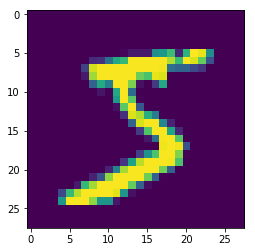

In [0]:

plt.imshow(x_train[0])

In [0]:
# Check for Theano vs Tensorflow Backend
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


**3.0 Define  Plot Function**

In [0]:
def plot_loss(x, vy, ty, xlabel='Epoch', ylabel='Categorical Crossentropy Loss'):
    _, = plt.plot(x, vy, 'b', label="Validation Loss")
    _, = plt.plot(x, ty, 'r', label="Train Loss")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.legend()
    plt.grid()
    plt.show()

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

In [0]:
from prettytable import PrettyTable
pt = PrettyTable()
pt.field_names = ['CNN Architecture', 'Mean Train Accuracy', 'Mean Validation Accuracy', 'Test Accuracy']

**4.0 Architecture of 2*2 Kernel**

**4.1 2-Conv+Dropout+Strides(1,1)**

Train on 18000 samples, validate on 42000 samples
Epoch 1/12
18000/18000 [==============================] - 55s 3ms/step - loss: 0.4738 - acc: 0.8523 - val_loss: 0.1303 - val_acc: 0.9610
Epoch 2/12
18000/18000 [==============================] - 54s 3ms/step - loss: 0.1678 - acc: 0.9486 - val_loss: 0.0854 - val_acc: 0.9741
Epoch 3/12
18000/18000 [==============================] - 54s 3ms/step - loss: 0.1210 - acc: 0.9627 - val_loss: 0.0755 - val_acc: 0.9772
Epoch 4/12
18000/18000 [==============================] - 54s 3ms/step - loss: 0.0981 - acc: 0.9688 - val_loss: 0.0730 - val_acc: 0.9780
Epoch 5/12
18000/18000 [==============================] - 54s 3ms/step - loss: 0.0736 - acc: 0.9767 - val_loss: 0.0732 - val_acc: 0.9785
Epoch 6/12
18000/18000 [==============================] - 54s 3ms/step - loss: 0.0672 - acc: 0.9784 - val_loss: 0.0730 - val_acc: 0.9799
Epoch 7/12
18000/18000 [==============================] - 55s 3ms/step - loss: 0.0555 - acc: 0.9819 - val_loss: 0.0677 - val_acc

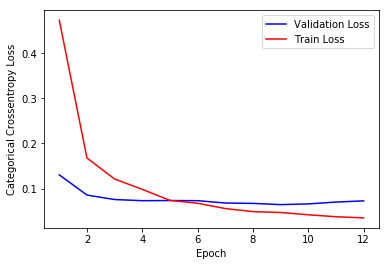

CPU times: user 20min 20s, sys: 20.8 s, total: 20min 41s
Wall time: 10min 54s


In [0]:
%%time
def get_cnn():
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), padding='valid', \
                     activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
    
    model.add(Conv2D(64, (2, 2), activation='relu', kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    
    return model

model = get_cnn()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.7)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x = list(range(1, epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)



In [0]:
pt.add_row(['2-Conv + Dropout + Kernel(2x2) + Strides(1x1)', sum(history.history['acc'])/len(history.history['acc']), \
            sum(history.history['val_acc'])/len(history.history['val_acc']), score[1]])

**5.0 Architecture of 3*3 Kernel**

**5.1 2-Conv + Strides(1,1)**

Train on 18000 samples, validate on 42000 samples
Epoch 1/12
18000/18000 [==============================] - 67s 4ms/step - loss: 0.2649 - acc: 0.9190 - val_loss: 0.1022 - val_acc: 0.9683
Epoch 2/12
18000/18000 [==============================] - 67s 4ms/step - loss: 0.0595 - acc: 0.9808 - val_loss: 0.0812 - val_acc: 0.9757
Epoch 3/12
18000/18000 [==============================] - 67s 4ms/step - loss: 0.0252 - acc: 0.9929 - val_loss: 0.0672 - val_acc: 0.9808
Epoch 4/12
18000/18000 [==============================] - 67s 4ms/step - loss: 0.0196 - acc: 0.9939 - val_loss: 0.0701 - val_acc: 0.9800
Epoch 5/12
18000/18000 [==============================] - 67s 4ms/step - loss: 0.0095 - acc: 0.9971 - val_loss: 0.0682 - val_acc: 0.9828
Epoch 6/12
18000/18000 [==============================] - 67s 4ms/step - loss: 0.0029 - acc: 0.9995 - val_loss: 0.0699 - val_acc: 0.9822
Epoch 7/12
18000/18000 [==============================] - 67s 4ms/step - loss: 0.0054 - acc: 0.9984 - val_loss: 0.0662 - val_acc

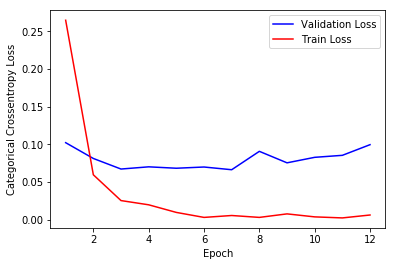

CPU times: user 25min 48s, sys: 22.1 s, total: 26min 10s
Wall time: 13min 33s


In [0]:
%%time
def get_cnn():
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', \
                     activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
    
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    
    return model

model = get_cnn()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.7)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x = list(range(1, epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)

pt.add_row(['2-Conv + Kernel(3x3) + Strides(1x1)', sum(history.history['acc'])/len(history.history['acc']), \
            sum(history.history['val_acc'])/len(history.history['val_acc']), score[1]])

**5.2 2-Conv + Dropout + Strides(1,1)**

Train on 18000 samples, validate on 42000 samples
Epoch 1/12
18000/18000 [==============================] - 70s 4ms/step - loss: 0.4865 - acc: 0.8538 - val_loss: 0.1088 - val_acc: 0.9677
Epoch 2/12
18000/18000 [==============================] - 69s 4ms/step - loss: 0.1534 - acc: 0.9543 - val_loss: 0.0738 - val_acc: 0.9773
Epoch 3/12
18000/18000 [==============================] - 69s 4ms/step - loss: 0.1085 - acc: 0.9664 - val_loss: 0.0676 - val_acc: 0.9802
Epoch 4/12
18000/18000 [==============================] - 70s 4ms/step - loss: 0.0807 - acc: 0.9751 - val_loss: 0.0650 - val_acc: 0.9801
Epoch 5/12
18000/18000 [==============================] - 70s 4ms/step - loss: 0.0716 - acc: 0.9777 - val_loss: 0.0585 - val_acc: 0.9831
Epoch 6/12
18000/18000 [==============================] - 70s 4ms/step - loss: 0.0588 - acc: 0.9808 - val_loss: 0.0544 - val_acc: 0.9845
Epoch 7/12
18000/18000 [==============================] - 70s 4ms/step - loss: 0.0546 - acc: 0.9815 - val_loss: 0.0545 - val_acc

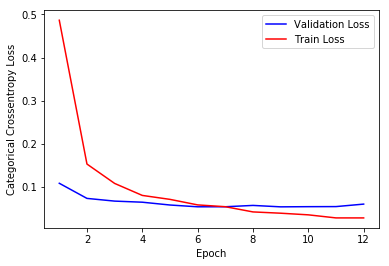

CPU times: user 26min 46s, sys: 25.5 s, total: 27min 11s
Wall time: 14min 3s


In [0]:
%%time
def get_cnn():
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', \
                     activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
    
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    
    return model

model = get_cnn()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.7)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x = list(range(1, epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)

pt.add_row(['2-Conv + Dropout + Kernel(3x3) + Strides(1x1)', sum(history.history['acc'])/len(history.history['acc']), \
            sum(history.history['val_acc'])/len(history.history['val_acc']), score[1]])

**5.3 5-Conv + BN + Dropout + Strides(1,1)**

W0729 08:51:15.443840 139971163633536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



Train on 18000 samples, validate on 42000 samples
Epoch 1/12
18000/18000 [==============================] - 238s 13ms/step - loss: 0.7398 - acc: 0.7699 - val_loss: 0.1357 - val_acc: 0.9587
Epoch 2/12
18000/18000 [==============================] - 237s 13ms/step - loss: 0.1929 - acc: 0.9399 - val_loss: 0.0895 - val_acc: 0.9722
Epoch 3/12
18000/18000 [==============================] - 236s 13ms/step - loss: 0.1351 - acc: 0.9589 - val_loss: 0.0737 - val_acc: 0.9764
Epoch 4/12
18000/18000 [==============================] - 236s 13ms/step - loss: 0.1117 - acc: 0.9666 - val_loss: 0.0576 - val_acc: 0.9821
Epoch 5/12
18000/18000 [==============================] - 236s 13ms/step - loss: 0.0976 - acc: 0.9704 - val_loss: 0.0892 - val_acc: 0.9737
Epoch 6/12
18000/18000 [==============================] - 236s 13ms/step - loss: 0.0886 - acc: 0.9724 - val_loss: 0.0482 - val_acc: 0.9851
Epoch 7/12
18000/18000 [==============================] - 236s 13ms/step - loss: 0.0740 - acc: 0.9767 - val_loss: 0.

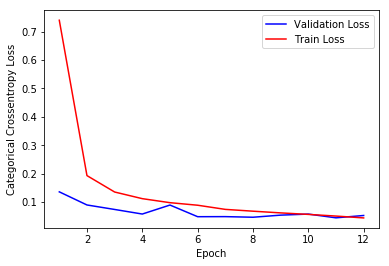

CPU times: user 1h 32min 54s, sys: 50.4 s, total: 1h 33min 44s
Wall time: 47min 41s


In [0]:
%%time
epochs = 12
def get_cnn():
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', \
                     activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
    
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))    
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Conv2D(16, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))    
    model.add(Conv2D(16, (3, 3), activation='relu', padding='valid', kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    
    return model

model = get_cnn()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.7)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x = list(range(1, epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)

pt.add_row(['5-Conv + BN + Dropout + Kernel(3x3) + Strides(1x1)', sum(history.history['acc'])/len(history.history['acc']), \
            sum(history.history['val_acc'])/len(history.history['val_acc']), score[1]])-

**6.0 Architecture of 5*5  Kernel**

**6.1 2-Conv + Dropout + Strides(2,2)**

Train on 18000 samples, validate on 42000 samples
Epoch 1/12
18000/18000 [==============================] - 107s 6ms/step - loss: 0.3926 - acc: 0.8759 - val_loss: 0.0938 - val_acc: 0.9707
Epoch 2/12
18000/18000 [==============================] - 107s 6ms/step - loss: 0.1217 - acc: 0.9634 - val_loss: 0.0651 - val_acc: 0.9805
Epoch 3/12
18000/18000 [==============================] - 107s 6ms/step - loss: 0.0857 - acc: 0.9729 - val_loss: 0.0576 - val_acc: 0.9818
Epoch 4/12
18000/18000 [==============================] - 107s 6ms/step - loss: 0.0668 - acc: 0.9786 - val_loss: 0.0555 - val_acc: 0.9834
Epoch 5/12
18000/18000 [==============================] - 107s 6ms/step - loss: 0.0495 - acc: 0.9840 - val_loss: 0.0543 - val_acc: 0.9844
Epoch 6/12
18000/18000 [==============================] - 106s 6ms/step - loss: 0.0426 - acc: 0.9865 - val_loss: 0.0494 - val_acc: 0.9856
Epoch 7/12
18000/18000 [==============================] - 107s 6ms/step - loss: 0.0351 - acc: 0.9890 - val_loss: 0.0484 - 

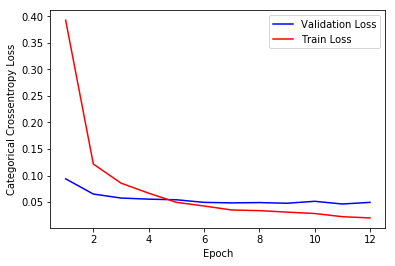

CPU times: user 41min 13s, sys: 25.2 s, total: 41min 39s
Wall time: 21min 29s


In [0]:
%%time
def get_cnn():
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(1, 1), padding='valid', \
                     activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
    
    model.add(Conv2D(64, (5,5), activation='relu', kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    
    return model

model = get_cnn()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.7)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x = list(range(1, epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)

pt.add_row(['2-Conv + Dropout+Kernel(5x5) + Strides(2x2)', sum(history.history['acc'])/len(history.history['acc']), \
            sum(history.history['val_acc'])/len(history.history['val_acc']), score[1]])---

**6.2 3-Conv+ BN + Dropout + Stride(2x2)**

Train on 18000 samples, validate on 42000 samples
Epoch 1/20
18000/18000 [==============================] - 80s 4ms/step - loss: 0.8281 - acc: 0.7315 - val_loss: 0.1593 - val_acc: 0.9516
Epoch 2/20
18000/18000 [==============================] - 80s 4ms/step - loss: 0.2032 - acc: 0.9375 - val_loss: 0.1204 - val_acc: 0.9626
Epoch 3/20
18000/18000 [==============================] - 79s 4ms/step - loss: 0.1385 - acc: 0.9586 - val_loss: 0.0822 - val_acc: 0.9748
Epoch 4/20
18000/18000 [==============================] - 80s 4ms/step - loss: 0.0938 - acc: 0.9712 - val_loss: 0.0661 - val_acc: 0.9800
Epoch 5/20
18000/18000 [==============================] - 79s 4ms/step - loss: 0.0805 - acc: 0.9754 - val_loss: 0.0540 - val_acc: 0.9840
Epoch 6/20
18000/18000 [==============================] - 80s 4ms/step - loss: 0.0681 - acc: 0.9783 - val_loss: 0.0483 - val_acc: 0.9856
Epoch 7/20
18000/18000 [==============================] - 79s 4ms/step - loss: 0.0564 - acc: 0.9822 - val_loss: 0.0503 - val_acc

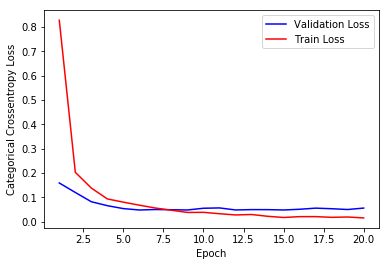

CPU times: user 49min 43s, sys: 1min 12s, total: 50min 56s
Wall time: 26min 33s


In [0]:
%%time
epochs = 20
def get_cnn():
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(5, 5), strides=(2, 2), padding='same', \
                     activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
    
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    
    return model

model = get_cnn()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.7)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x = list(range(1, epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)



In [0]:
pt.add_row(['3-Conv + BN + Dropout + Kernel(5x5) + Stride(2x2)', sum(history.history['acc'])/len(history.history['acc']), \
            sum(history.history['val_acc'])/len(history.history['val_acc']), score[1]])

**7. Conclusion**

1. Report on different Architecture

In [0]:
print(pt)

+----------------------------------------------------+---------------------+--------------------------+---------------+
|                  CNN Architecture                  | Mean Train Accuracy | Mean Validation Accuracy | Test Accuracy |
+----------------------------------------------------+---------------------+--------------------------+---------------+
|             2-Conv+Dropout+Kernel(2x2)             |   0.96668981481923  |    0.9784464285714286    |     0.983     |
|   2-Conv + Dropout + Kernel(2x2) + Strides(1x1)    |   0.96668981481923  |    0.9784464285714286    |     0.983     |
|        2-Conv + Kernel(3x3) + Strides(1x1)         |  0.9895370370326221 |    0.9798194444444445    |     0.9802    |
|   2-Conv + Dropout + Kernel(3x3) + Strides(1x1)    |  0.9694351852160913 |    0.9818730158730159    |     0.9857    |
| 5-Conv + BN + Dropout + Kernel(3x3) + Strides(1x1) |  0.9554907407672317 |    0.9801507936507936    |     0.9854    |
|    2-Conv + Dropout+Kernel(5x5) + Stri

3. MNIST Dataset has been used in this assignment.

3. In case of 5x5 Kernel with Batch Normalization and Droupout getting best result .

4. Accuracy seems to increase in case of Droupout and Batch Normalization.

5. In case of 5-Conv , Batch Normalization and Droupout with 3x3 kernel network is overfit.